# 1. Training a perception via scikit-learn

In [1]:
# import the iris dataset from scikit-learn

from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print(np.unique(y))
# [0 1 2] seperately represents ['setosa', 'versicolor', 'virginica']

[0 1 2]


In [2]:
# split the data into training and testing set

from sklearn.cross_validation import train_test_split

# random_state for reproduction
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 


In [3]:
# feature scaling for fast gradient decent

from sklearn.preprocessing import StandardScaler

# initialize an object
sc = StandardScaler()
# compute mu and sigma to be used for later scaling
sc.fit(X_train)
# then use the stored mu and sigma to transform the data below
X_train_std = sc.transform(X_train)
X_test_std  = sc.transform(X_test)


In [4]:
# using perception to train the model

from sklearn.linear_model import Perceptron

# random_state: for reproduction, shuffle the data after each epoch
ppn = Perceptron(n_iter=40, eta0=0.1, random_state=0)
## fit will return an instance of self
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=40, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

In [5]:
## using ppn to predict the testset
y_pred = ppn.predict(X_test_std)
print('Misclassed samples : %d' % (y_pred != y_test).sum())

Misclassed samples : 4


In [6]:
## using accuracy metric 
from sklearn.metrics import accuracy_score

print('Accuracy of the test set: %.2f' % accuracy_score(y_pred, y_test))

Accuracy of the test set: 0.91


In [7]:
# define the decision boundry
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
%matplotlib inline

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot all samples
#    X_test, y_test = X[test_idx, :], y[test_idx]                               
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)
        
    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]   
        plt.scatter(X_test[:, 0], X_test[:, 1], c='', 
                alpha=1.0, linewidth=1, marker='o', 
                s=55, label='test set')

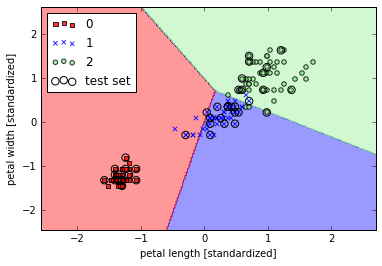

In [8]:
# draw the plot

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined_std = np.hstack((y_train, y_test))

plot_decision_regions(X_combined_std, y_combined_std, ppn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

# plt.tight_layout()
plt.show()

# 2. Logistic Regression via scikit-learn

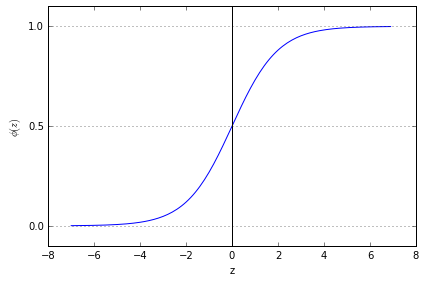

In [9]:
# plot the sigmod function

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)
plt.plot(z, phi_z)
plt.axvline(0.0, color='k')

plt.ylim([-0.1, 1.1])
plt.xlabel('z')
plt.ylabel('$\phi (z)$')

# add ticks and gridline
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)

plt.tight_layout()
plt.show()


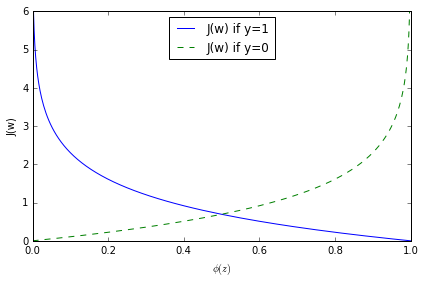

In [10]:
## plot the cost function

def cost_1(z):
    return - np.log(sigmoid(z))

def cost_0(z):
    return - np.log(1 - sigmoid(z))

z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)

plt.plot(phi_z, cost_1(z), label='J(w) if y=1')
plt.ylim([0, 6])

plt.plot(phi_z, cost_0(z), linestyle='--', label='J(w) if y=0')
plt.xlabel('$\phi (z)$')
plt.ylabel('J(w)')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

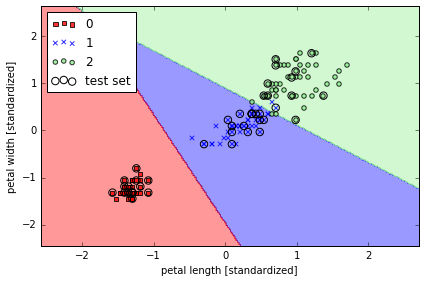

In [11]:
# train the LogReg model with scikit-learn
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1000.0, random_state=0)

lr.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,
                     y_combined_std, lr,
                     test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [12]:
# predict test sets
print('feature numbers %d' % np.size(X, 1))
print(lr.coef_)
print(lr.intercept_)

print(lr.predict(X_test_std[0:5, :]))

print(lr.predict_proba(X_test_std[0:5, :]))

feature numbers 2
[[-7.34015187 -6.64685581]
 [ 2.54373335 -2.3421979 ]
 [ 9.46617627  6.44380858]]
[-9.31757401 -0.89462847 -8.85765974]
[2 1 0 2 0]
[[  2.05743774e-11   6.31620264e-02   9.36837974e-01]
 [  6.08753106e-04   9.99285569e-01   1.05678028e-04]
 [  8.16962653e-01   1.83037347e-01   6.48299403e-14]
 [  1.60866539e-11   4.14084479e-01   5.85915521e-01]
 [  8.00231776e-01   1.99768224e-01   1.07576258e-13]]


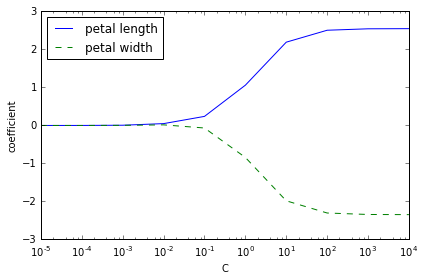

In [13]:
# illustrate how c affects

weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)

weights = np.array(weights)    
plt.plot(params, weights[:, 0], label='petal length')
plt.plot(params, weights[:, 1], linestyle='--', label='petal width')

plt.xscale('log')
plt.xlabel('C')
plt.ylabel('coefficient')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


# SVM via scikit-learn

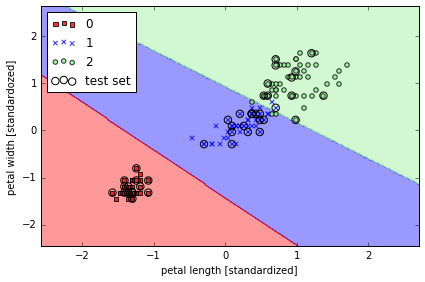

In [15]:
from sklearn.svm import SVC

# train svm with 'linear kernel'
svm = SVC(kernel='linear', C=1.0, random_state=0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined_std,
                     svm, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardozed]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [18]:
## indices of support vectors
print(svm.support_)

## number of svs for each class
print(svm.n_support_)

[56 66  7 13 15 21 29 32 34 70 72 87 88 96  3  9 10 11 12 17 31 53 74 92]
[ 2 12 10]


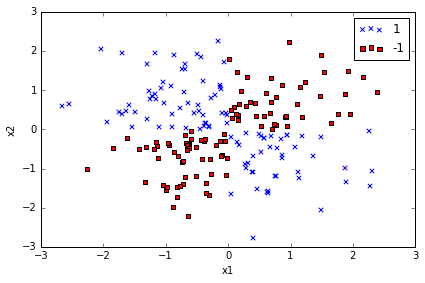

In [30]:
# train non-linear SVM

#1. generate and plot the data
np.random.seed(0)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

plt.scatter(X_xor[y_xor==1, 0], X_xor[y_xor==1, 1], c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor==-1, 0], X_xor[y_xor==-1, 1], c='r', marker='s', label='-1')

plt.xlabel('x1')
plt.ylabel('x2')
plt.ylim([-3, 3])
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

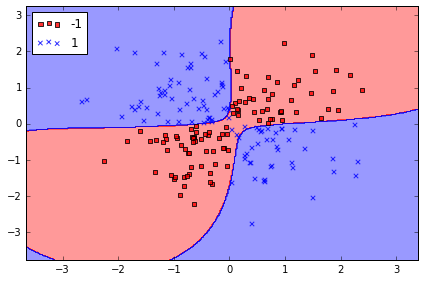

In [35]:
# 2. fit the non-linear model and draw the decision boundary
svm = SVC(kernel='rbf', gamma=0.20, C=10.0, random_state=0)
svm.fit(X_xor, y_xor)

plot_decision_regions(X_xor, y_xor, svm)
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [36]:
X_test_xor = np.random.randn(300, 2)
y_test_xor = np.logical_xor(X_test_xor[:, 0] > 0, X_test_xor[:, 1] > 0)
y_test_xor = np.where(y_test_xor, 1, -1)

pred_y_test_xor = svm.predict(X_test_xor)
# print(np.size(pred_y_test_xor))
# print(np.unique(pred_y_test_xor))
print('Accuracy of the testset is %.2f' % accuracy_score(pred_y_test_xor, y_test_xor))

Accuracy of the testset is 0.94


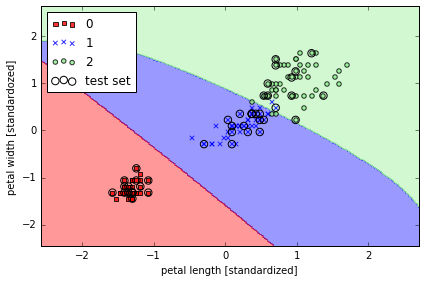

In [29]:
# show the difference between different gammas

#1. with a small gamma
svm1 = SVC(kernel='rbf', gamma=0.2, C=1.0, random_state=0)
svm1.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined_std,
                     svm1, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardozed]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

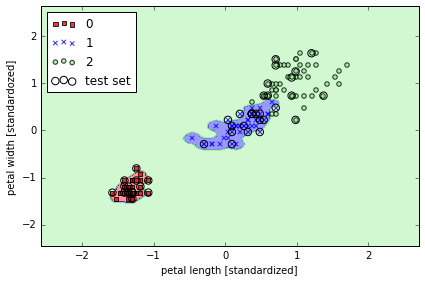

In [28]:
#2. with a big gamma
svm2 = SVC(kernel='rbf', gamma=100, C=1.0, random_state=0)
svm2.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined_std,
                     svm2, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardozed]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

# k-nearest neighbours -- a lazy learning algorithm

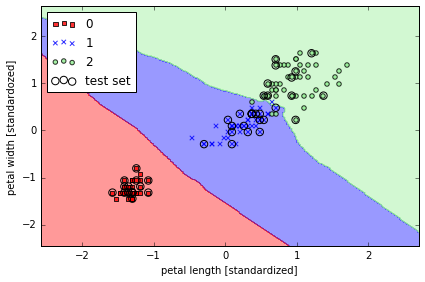

In [47]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined_std,
                     knn, test_idx=range(105, 150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardozed]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [48]:
pred = knn.predict(X_train_std)
print('Accuracy on training set is %.2f' % accuracy_score(pred, y_train))

Accuracy on training set is 0.95
